In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [3]:
import os

In [4]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [5]:
for subdir, _, _ in os.walk(RESULTS_DIR):
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 4:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/2/MLP 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/2/LeNet 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/2/XCEPTION 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/2/VGG19 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/1/MLP 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/1/LeNet 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/1/XCEPTION 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/1/VGG19 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/0/MLP 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/0/LeNet 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/0/XCEPTION 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.angle/0/VGG19 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.position_non_aligned_scale/2/MLP 8
/n/regal/pfister_lab/PERCEPTION/RESULTS/C.Figure1.position_non_aligned_scale/2/LeNet 8
/n/regal/pfister_lab/PERCEPTION/R

In [ ]:
for f in *_XCEPTION_True.sbatch; do sbatch $f; done

In [6]:
import glob
import cPickle as pickle

In [73]:
experiments = ['C.Figure1.angle', 'C.Figure1.curvature']
all_labels = {'C.Figure1.angle': ['variable Angle', '+ variable Y', '+ variable X'], \
              'C.Figure1.curvature': ['variable Curvature', '+ variable Y', '+ variable X', '+ variable Width']}

all_results = {}

for experiment in experiments:

    e_dir = os.path.join(RESULTS_DIR, experiment)
    datasets = sorted(os.listdir(e_dir))
    print datasets
    results = [None]*4

    classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        results[i] = []
        for d in datasets:
            d_dir = os.path.join(e_dir, d)

            stats_files = ['01_noise.p', '02_noise.p', '03_noise.p', '04_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
            MLAEs = []

            for s in stats_files:

                with open(os.path.join(d_dir, c)+'/'+s, 'r') as f:
                    stats = pickle.load(f)
                MLAEs.append(stats['MLAE'])

            results[i].append(MLAEs)
            
    print 'Loaded', experiment
            
    all_results[experiment] = results
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

['0', '1', '2']
Loaded C.Figure1.angle
['0', '1', '2', '3']
Loaded C.Figure1.curvature


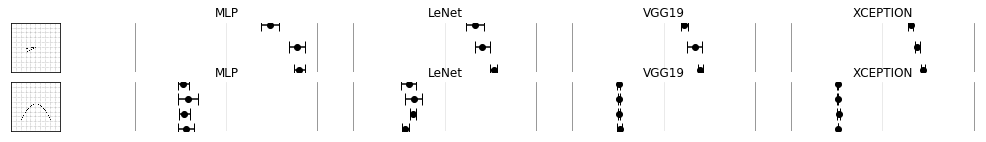

In [83]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, (m-h), m+h, h

plt.figure(figsize=(18,len(experiments)), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 5, width_ratios=[0.7,1,1,1,1])
# experiments = [experiments[1]]

# print experiments

j = 0
for experiment in experiments:
    
    for i,c in enumerate(['Image','MLP', 'LeNet', 'VGG19', 'XCEPTION']):

        fig = plt.subplot(gs[j])
        j += 1
        
        if i == 0:
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            Util.imshow_nicely(eval(experiment)()[1], new_figure=False)

            continue


        plt.title(c)
    #     plt.xlabel('Classifier')
    #     plt.xlabel('Log Error')

        labels = all_labels[experiment]#['variable Angle', '+ variable Y', '+ variable X']
#         print labels
        data = all_results[experiment][i-1]
        
        means = [np.mean(r) for r in data]
#         print means
        confidence = [mean_confidence_interval(r)[3] for r in data]
#         print confidence
        plt.xlim(-3,6.1)
    #     plt.axis('off')
    #     fig.patch.set_visible(False)
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_yaxis().set_ticks([])
        ax.get_xaxis().set_ticks(np.arange(-6,7,12))
        ax.get_xaxis().set_ticks(np.arange(0,0.1), minor=True)

        # remove ticks on x
        from matplotlib.ticker import NullFormatter
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.xaxis.set_ticks_position('none')

        ax.axes.get_yaxis().set_ticklabels([])

    #     ax.patch.set_visible(False)
    #     cur_axes.axes.get_xaxis().set_ticklabels([])

    #     ax.tick_params(axis='x', which='major', pad=15)
    #     plt.yticks(np.arange(0,5,1))
    #     plt.xticks(np.arange(0,6.1, 3))
        plt.grid(True, color='gray', which='major', alpha=1)
        plt.grid(True, color='gray', which='minor', alpha=0.2)
        
#         print 'A', means, labels, confidence
        errorbars = plt.errorbar(means, labels, xerr=confidence, fmt='o', color='black', capsize=6)
       

In [66]:
eval(experiment)()

TypeError: 'module' object is not callable

In [67]:
print experiment

C


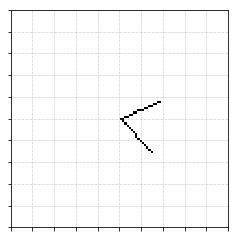

In [22]:
Util.imshow_nicely(eval(experiment)()[1])

In [34]:
means, labels

([-2.8080879959057308,
  -2.4906197776148327,
  -2.7302100732953889,
  -2.6082542250304144],
 ['variable Angle', '+ variable Y', '+ variable X'])

In [132]:
mins

[1.7192426817387523, 2.2198943493338108, 2.5510833514829736]

In [133]:
maxs

[1.9473423802358294, 2.4231211690738697, 2.7351373269257619]

In [136]:
(mins, maxs)

([1.7192426817387523, 2.2198943493338108, 2.5510833514829736],
 [1.9473423802358294, 2.4231211690738697, 2.7351373269257619])

In [150]:
confidence

[2.2661355504204352,
 array([ 1.16738975,  1.17081953,  1.28061807,  1.45913129]),
 array([ 3.36488135,  3.36145157,  3.25165303,  3.07313981]),
 array([ 1.0987458 ,  1.09531602,  0.98551748,  0.80700426])]

In [138]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr
print x
print y
print xerr

[ 0.1  0.6  1.1  1.6  2.1  2.6  3.1  3.6]
[ 0.90483742  0.54881164  0.33287108  0.20189652  0.12245643  0.07427358
  0.0450492   0.02732372]
[ 0.26324555  0.35491933  0.40976177  0.45298221  0.48982753  0.52249031
  0.55213634  0.57947332]


In [121]:
import numpy as np, scipy.stats as st

cints = np.zeros((2, len(results[1])))

for z,r in enumerate(results[1]):
    print r
    m,i,j = mean_confidence_interval(r)
    cints[0,z] = i
    cints[1,z] = j

[1.7975809878019353, 1.5491893653924598]
[2.9174054981466879, 2.3409907352282753]
[3.4120250038421158, 3.1797806452814772]


In [123]:
cints

array([[ 0.09532777, -1.03282388,  1.82043064],
       [ 3.25144258,  6.29122011,  4.77137501]])

In [147]:
mean_confidence_interval(results[0][1])

(4.6730152972474555,
 4.1527393375449257,
 5.1932912569499852,
 0.52027595970253016)

[[3.4371376507239724, 2.589734799307946],
 [4.9569597644077756, 4.9504569373217278],
 [4.9911288314507596, 4.7263080829480923]]